
# Introducción al Análisis Exploratorio de Datos (EDA)

El Análisis Exploratorio de Datos (EDA) es un componente esencial en la investigación de cualquier conjunto de datos, especialmente cuando se trata de abordar cuestiones críticas relacionadas con la seguridad vial en una ciudad dinámica y en constante evolución, como Buenos Aires. En el proceso de análisis de datos previamente recopilados y preparados mediante el proceso ETL, el EDA asume un papel fundamental al proporcionar una visión profunda y detallada de la información subyacente.

El EDA no se limita simplemente a la generación de estadísticas descriptivas y visualización de datos; más bien, representa una exploración minuciosa que busca revelar patrones, relaciones, tendencias y anomalías que pueden no ser evidentes a primera vista. A través de técnicas de análisis estadístico y visualización de datos, el EDA nos permite comprender mejor la naturaleza y la magnitud de los siniestros viales, así como identificar posibles factores contribuyentes.

En el contexto de nuestra investigación, el EDA se presenta como una herramienta esencial para responder preguntas críticas, como la distribución de las edades de las víctimas, las ubicaciones y momentos más frecuentes de los siniestros viales, los tipos de calles involucradas y mucho más. Además, el EDA puede arrojar luz sobre la relación entre diversas variables, lo que facilita la identificación de áreas de mejora y la formulación de estrategias efectivas de seguridad vial.

A medida que exploramos los datos con mayor profundidad, nos encontramos en una posición única para abordar las deficiencias en la información, como la falta de datos en edades y fechas de fallecimiento de las víctimas, identificadas durante el proceso ETL. El EDA también nos brindará la oportunidad de comprender las implicaciones de estos datos faltantes y explorar enfoques para abordarlos de manera efectiva.

In [93]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Replace this with your CSV file path
csv = r'homicidios_limpio.csv'

# Read the CSV file with UTF-8 encoding
df = pd.read_csv(csv, encoding='utf-8')

Se observan las distribuciones y tendencias de los campos más significativos.

* Localización (Comunas y Barrios): Estas variables son esenciales para comprender dónde ocurren con mayor frecuencia los accidentes y, por lo tanto, dónde se deben enfocar los esfuerzos de prevención.

* Día y Hora del Siniestro: La información sobre el día de la semana y la hora del día en que ocurren los siniestros es crítica para planificar patrullajes y medidas de seguridad en momentos y lugares de mayor riesgo.

* Tipo de Calle: La clasificación de las calles involucradas en los siniestros, como avenidas, calles principales o secundarias, puede ayudar a identificar patrones relacionados con la infraestructura vial.

* Rol de la Víctima: Comprender el rol de la víctima, ya sea conductor, peatón, pasajero, ciclista, etc., es crucial para desarrollar estrategias de seguridad específicas para cada grupo.

* Edad y Género de la Víctima: Estas variables permiten identificar grupos demográficos específicos que pueden ser más vulnerables y, por lo tanto, requieren enfoques de seguridad diferenciados.

* Tipo de Vehículo Involucrado: Conocer el tipo de vehículo involucrado, como automóviles, motocicletas o vehículos de carga, es importante para evaluar la seguridad y regulación de cada categoría.

* Fatalidades: La gravedad de las lesiones y el resultado final, en este caso analizando la fatalidad, son indicadores clave de la magnitud de los siniestros y su impacto en la salud pública.

* Tiempo de Hospitalización: Esta variable puede ayudar a comprender la duración de la atención médica requerida para las víctimas y la necesidad de recursos médicos a largo plazo.

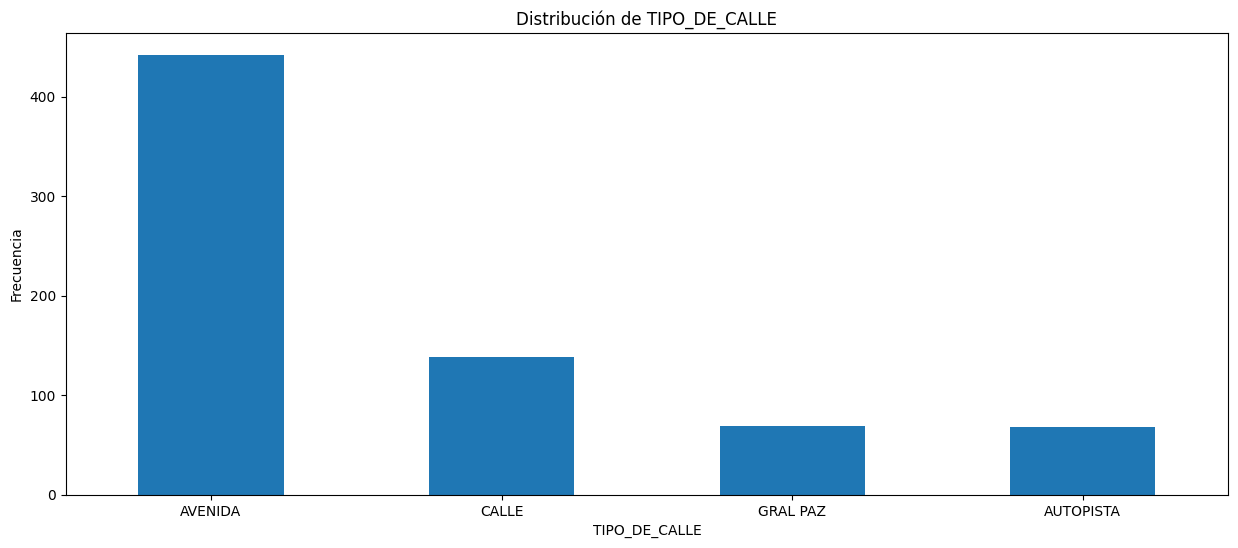

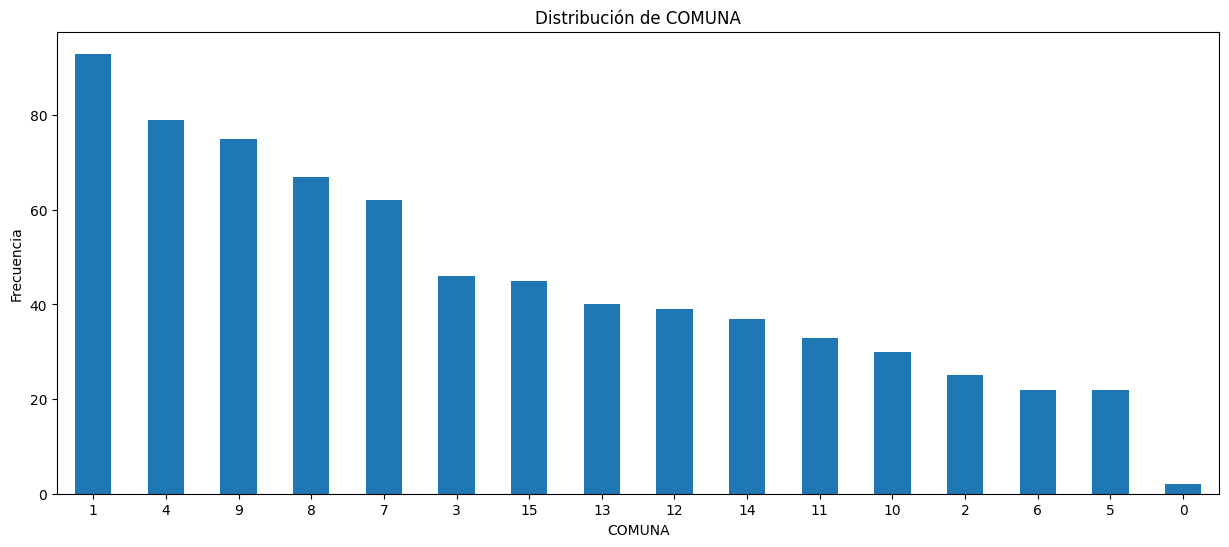

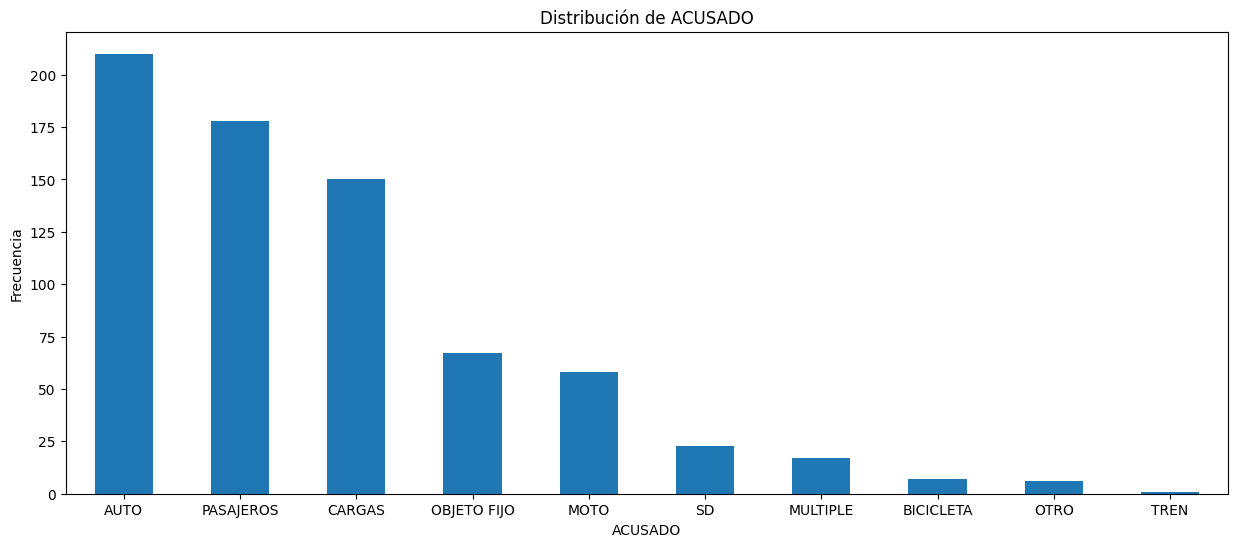

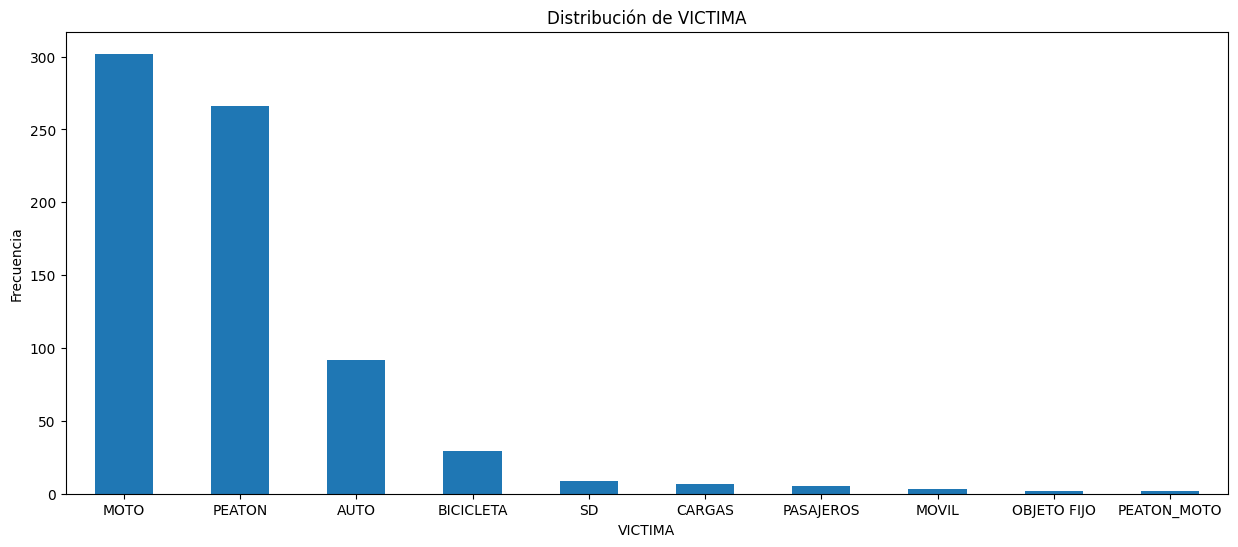

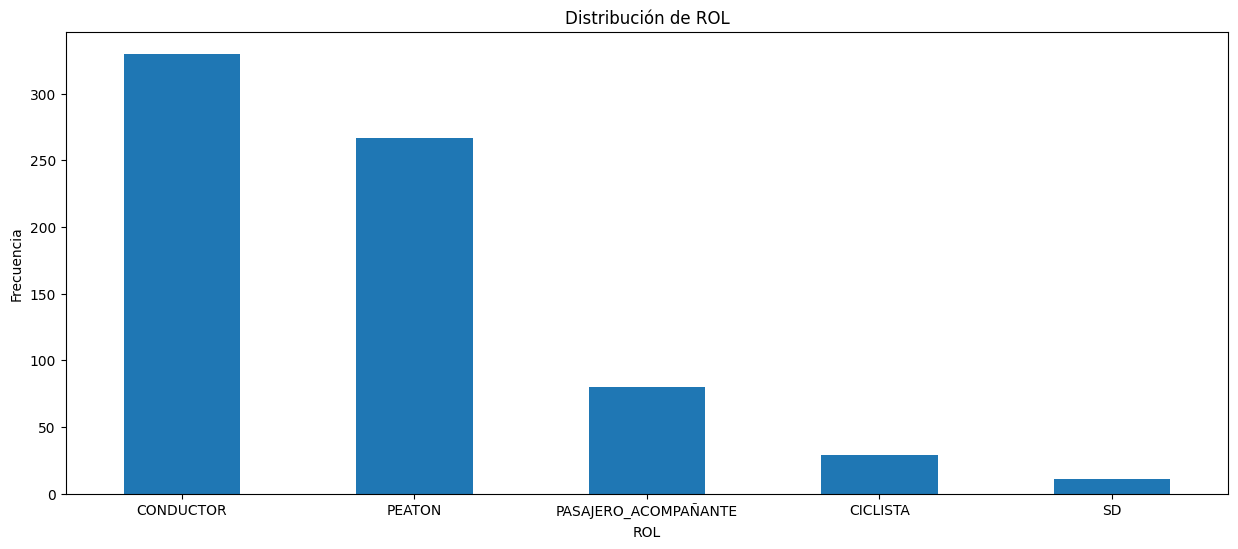

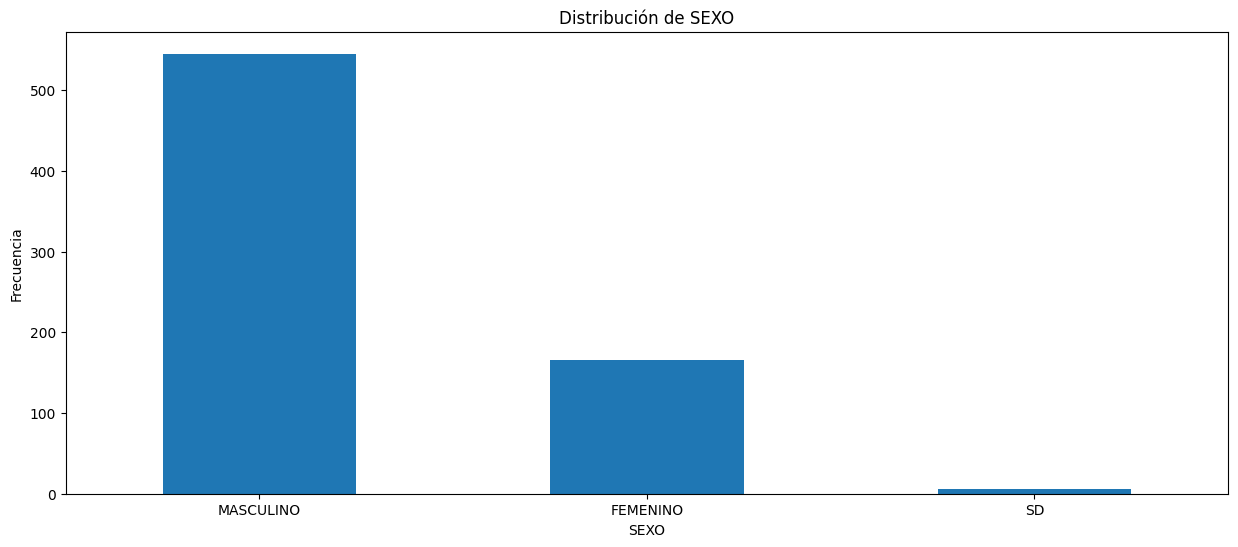

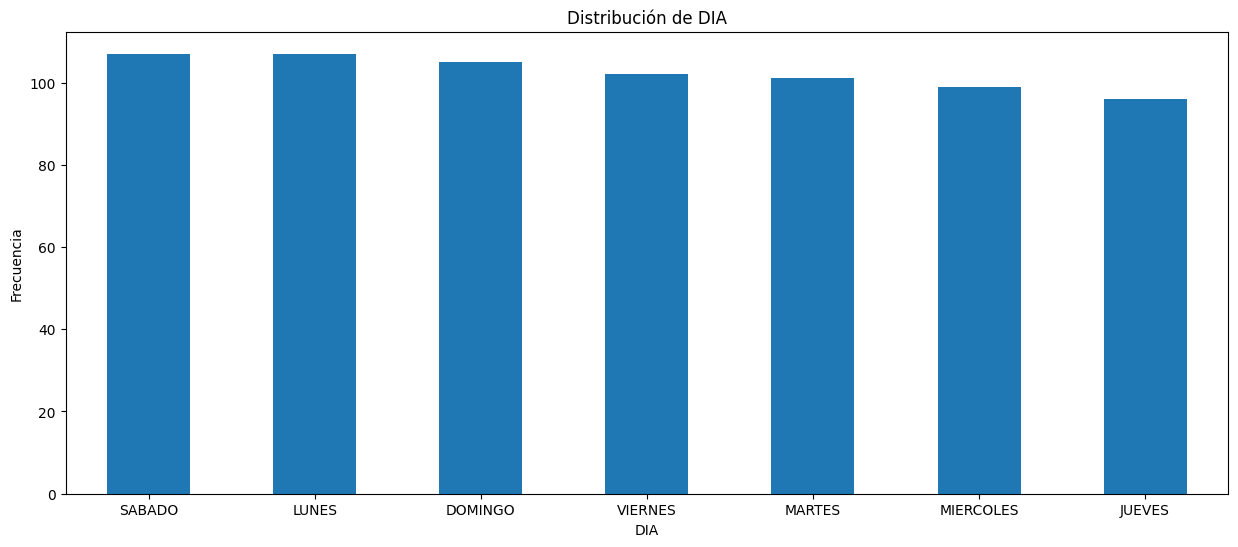

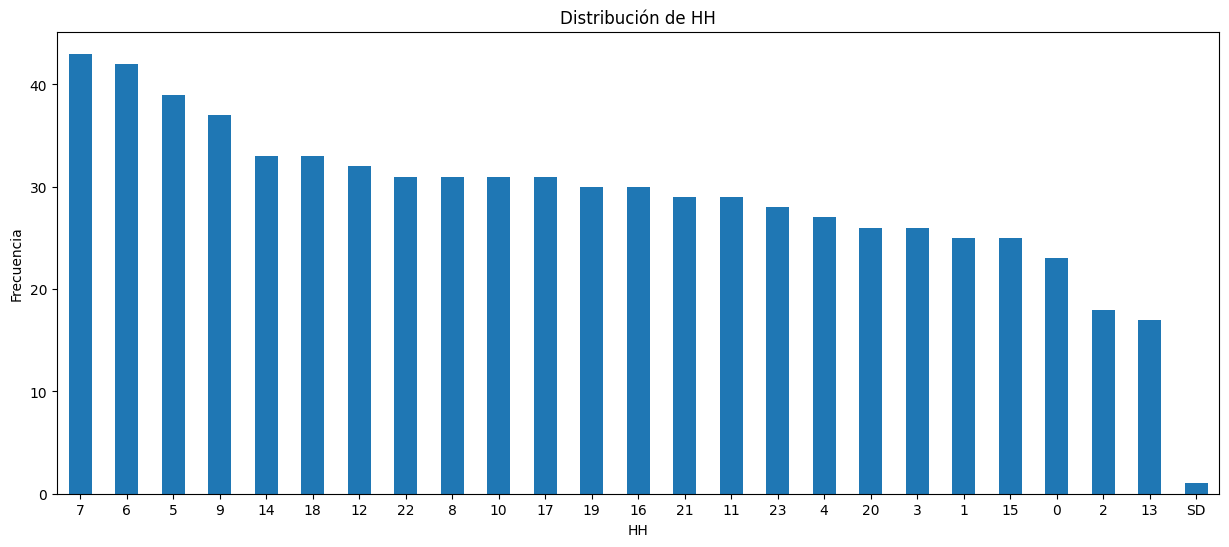

In [94]:
columnas = ["TIPO_DE_CALLE", "COMUNA", "ACUSADO", "VICTIMA", "ROL", "SEXO", "DIA", "HH"]

# Loop through the columns and create bar plots
for col in columnas:
    # Count the frequency of each category in the column
    value_counts = df[col].value_counts()
    
    # Plot the bar chart
    plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
    value_counts.plot(kind='bar', title="Distribución de " + str(col))
    
    # Customize the plot (optional)
    plt.xlabel(col)  # Label the x-axis with the column name
    plt.ylabel("Frecuencia")  # Label the y-axis
    plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
    
    plt.show()


### A simple vista, los siguientes datos llaman la atención:


* Avenidas de Alto Riesgo: La alta incidencia de siniestros en avenidas señala la importancia de evaluar y mejorar la seguridad en estas arterias principales de la ciudad. Esto podría implicar medidas específicas de diseño vial y regulaciones de tráfico.

* Estabilidad en la Distribución Diaria: La uniformidad en la cantidad de siniestros por día sugiere que los incidentes no están concentrados en días específicos, lo que podría indicar que se necesita una atención continua en la seguridad vial en lugar de centrarse en días particulares de la semana.

* Horarios Críticos: Los siniestros viales más frecuentes en las primeras horas de la mañana plantean la necesidad de medidas específicas para reducir los riesgos durante ese período. Esto podría incluir campañas de concienciación y patrullaje reforzado.

* Ubicación geográfica: La comuna 1 se destaca como la de mayor cantidad de incidentes. La misma se compone de los barrios de: San Nicolás, Monserrat, San Telmo y Retiro que comprenden el "microcentro porteño", demuestrando que la zona geográfica de mayor siniestralidad es el centro de la ciudad.

* Perfil de las Víctimas: La mayoría de las víctimas son hombres, lo que puede indicar la necesidad de enfoques dirigidos para promover la seguridad vial entre este grupo demográfico, como campañas de educación específicas.

* Roles de las Víctimas: La identificación de los conductores de vehículos y peatones como las principales víctimas destaca la importancia de proteger a estos grupos y promover un comportamiento responsable en las vías públicas.

* Tipos de Vehículos Involucrados: La participación predominante de automóviles, transporte de pasajeros y transporte de carga en los siniestros subraya la necesidad de supervisión y regulación específica para estos tipos de vehículos, así como la promoción de prácticas de conducción segura.

Estos hallazgos son fundamentales para guiar futuras acciones y políticas de seguridad vial en Buenos Aires. El análisis de datos continuo y la implementación de medidas específicas basadas en estos resultados pueden contribuir significativamente a la reducción de siniestros viales y la protección de la vida de los ciudadanos.

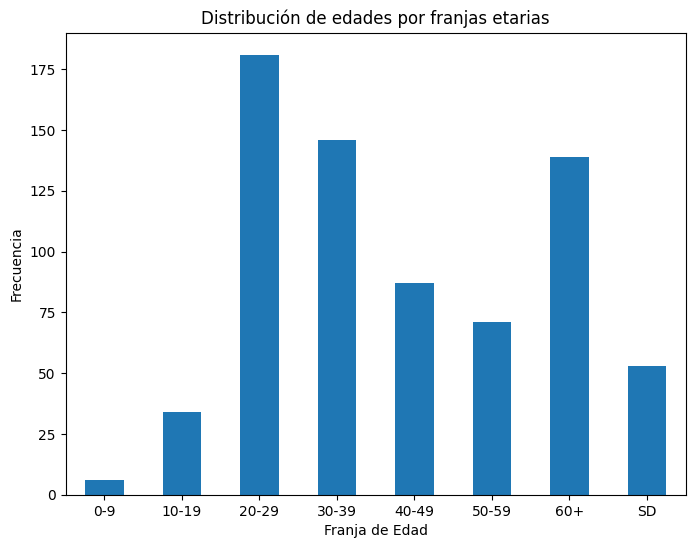

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar y convertir los valores numéricos a números, y contar los 'SD'
numeric_values = []
sd_count = 0

for value in df['EDAD']:
    if value.isnumeric():
        numeric_values.append(int(value))
    elif value == 'SD':
        sd_count += 1

# Crear un DataFrame con los valores numéricos
df_numeric = pd.DataFrame({'EDAD': numeric_values})

# Definir los límites de las franjas de edad
edades_bins = [0, 9, 19, 29, 39, 49, 59, df_numeric['EDAD'].max()]

# Etiquetas para las franjas
edades_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60+']

# Crear una nueva columna 'edad_franja' que asigna cada edad a una franja
df_numeric['edad_franja'] = pd.cut(df_numeric['EDAD'], bins=edades_bins, labels=edades_labels)

# Contar las frecuencias de cada franja
edad_franja_counts = df_numeric['edad_franja'].value_counts().sort_index()

# Agregar la cuenta de 'SD' a las frecuencias
edad_franja_counts['SD'] = sd_count

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
edad_franja_counts.plot(kind='bar', title='Distribución de edades por franjas etarias')
plt.xlabel('Franja de Edad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

### Se evidencia que la población económicamente activa es la gran protagonista ante siniestros viales

* Impacto en la Economía: La vulnerabilidad de la población económicamente activa puede tener un impacto económico significativo. Los accidentes de tráfico pueden resultar en lesiones que limiten la capacidad de trabajo y generación de ingresos, lo que afecta directamente a la capacidad de las personas para mantener a sus familias.

* Importancia de la Prevención: Dado que esta población es crucial para la economía y la sociedad en general, es imperativo tomar medidas efectivas para prevenir siniestros viales. Esto puede incluir campañas de seguridad vial dirigidas a conductores en edad de trabajar, así como iniciativas de educación vial.

* Evaluación de Factores de Riesgo: Es importante analizar en detalle los factores de riesgo específicos que contribuyen a la vulnerabilidad de la población económicamente activa. Estos factores pueden incluir la exposición a situaciones de tráfico intensas, horarios laborales que coinciden con períodos de alto riesgo y la necesidad de desplazarse largas distancias para el trabajo.

* Coordinación Interinstitucional: La colaboración entre agencias gubernamentales, empresas y organizaciones de la sociedad civil es fundamental para abordar este problema. Las estrategias de seguridad vial deben enfocarse en la protección de esta población en particular.

* Monitoreo y Evaluación Continua: El seguimiento y la evaluación continuos de las políticas y programas de seguridad vial son esenciales para medir el impacto y realizar ajustes cuando sea necesario. Esto ayudará a garantizar que se estén tomando medidas efectivas para proteger a la población económicamente activa.

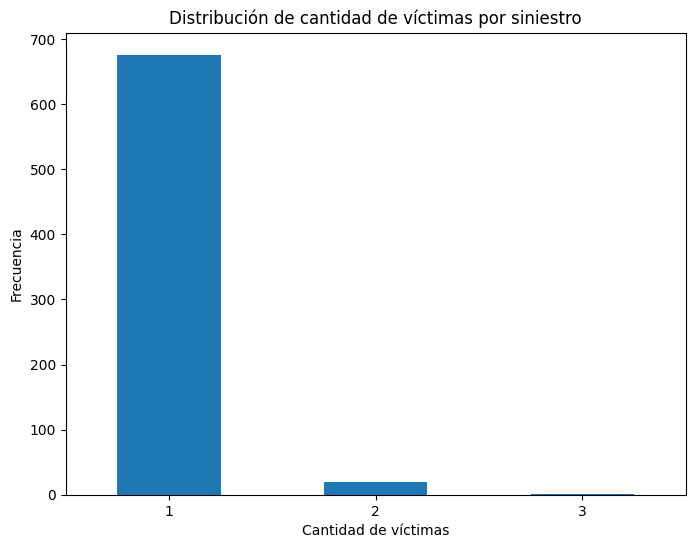

In [96]:

# Contar la frecuencia de cada ID
id_counts = df['ID'].value_counts()

# Contar la frecuencia de ocurrencia de cada frecuencia (1 vez, 2 veces, 3 veces, etc.)
frequency_counts = id_counts.value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
frequency_counts.plot(kind='bar', title='Distribución de cantidad de víctimas por siniestro')
plt.xlabel('Cantidad de víctimas')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

### La mayoría de los siniestros generan una única víctima, en su mayoría el conductor del rodado y el peatón. No se evidencia gran cantidad de siniestros con más de una víctima y nunca más de 3

* Eventos de Menor Gravedad: La prevalencia de siniestros con una sola víctima puede sugerir que la mayoría de los accidentes son de menor gravedad. Estos pueden incluir colisiones menores o incidentes en los que solo una persona se ve directamente afectada.

* Impacto en los Recursos de Emergencia: El conocimiento de que la mayoría de los siniestros tienen una sola víctima puede ser útil para la planificación y asignación de recursos de emergencia. Esto permite que los servicios de atención médica y de rescate estén mejor preparados para responder a incidentes de un solo afectado.

* Excepciones Ocasionales: Aunque la mayoría de los siniestros pueden involucrar una sola víctima, es importante recordar que existen excepciones. Los casos en los que hay dos o tres víctimas deben ser analizados con mayor detalle para comprender las circunstancias que los rodean y considerar medidas adicionales de seguridad y prevención.

* Enfoque en la Prevención: La información sobre la cantidad de víctimas por siniestro puede ayudar a las autoridades y organizaciones de seguridad vial a enfocar sus esfuerzos en la prevención de siniestros y en la promoción de prácticas de conducción segura.

* Educación y Concientización: Los datos sobre la cantidad de víctimas por siniestro también pueden ser utilizados en campañas de educación y concientización para resaltar la importancia de la responsabilidad individual al volante y fomentar una mayor atención a la seguridad vial.

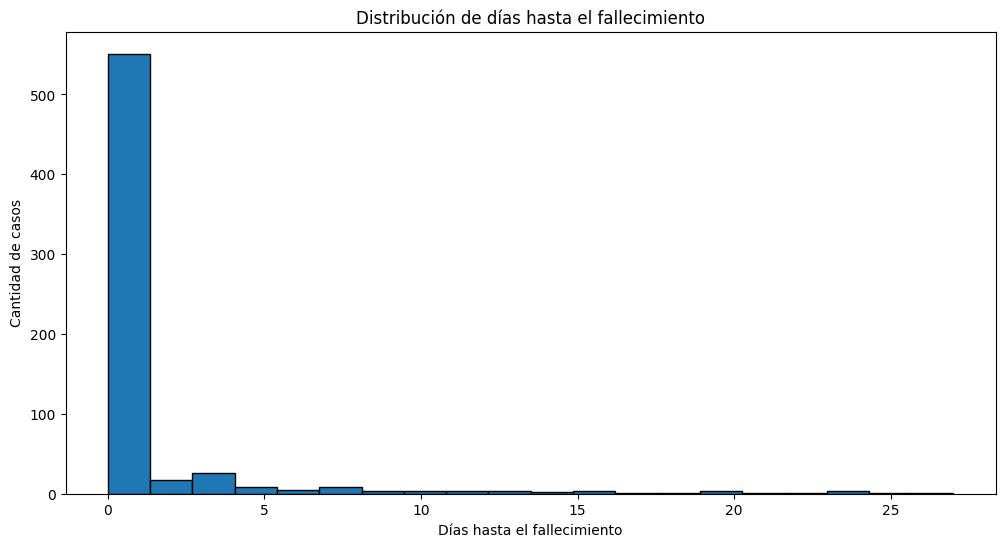

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Convertir las columnas 'FECHA' y 'FECHA_FALLECIMIENTO' a tipo de dato datetime
df['FECHA'] = pd.to_datetime(df['FECHA'])
df['FECHA_FALLECIMIENTO'] = pd.to_datetime(df['FECHA_FALLECIMIENTO'], errors='coerce')

# Calcular la diferencia de días entre 'FECHA' y 'FECHA_FALLECIMIENTO'
df['DIFERENCIA_DIAS'] = (df['FECHA_FALLECIMIENTO'] - df['FECHA']).dt.days

# Lidiar con los valores faltantes o 'SD' (sin datos)
df['DIFERENCIA_DIAS'] = df['DIFERENCIA_DIAS'].fillna(np.nan)  # Convertir 'SD' a NaN

# Crear un histograma para visualizar la distribución de días
plt.figure(figsize=(12, 6))
plt.hist(df['DIFERENCIA_DIAS'].dropna(), bins=20, edgecolor='black')
plt.xlabel('Días hasta el fallecimiento')
plt.ylabel('Cantidad de casos')
plt.title('Distribución de días hasta el fallecimiento')
plt.show()
df.drop(columns='DIFERENCIA_DIAS', inplace=True)

### Gravedad de los incidentes, casi todas las víctimas fallecen en el momento o en el transcurso del día.

* Gravedad de los Accidentes: Si bien anteriormente se deducía que los siniestros viales que terminan con un fallecido contra la falta de grandes cantidades de víctimas implicaba en cierta medida incidentes menores, el hecho de que muchos siniestros viales resulten en la muerte de la víctima el mismo día subraya la gravedad de estos incidentes. Esto pone de manifiesto la necesidad de implementar medidas efectivas de prevención y control de tráfico para reducir la ocurrencia de accidentes fatales.

* Atención Médica Inmediata: La atención médica inmediata y de emergencia es crucial en casos de siniestros viales graves. Los servicios de respuesta rápida y la disponibilidad de instalaciones médicas cercanas desempeñan un papel vital en la supervivencia de las víctimas.

* Lesiones Graves: Además de las muertes el mismo día, es importante considerar las lesiones graves que pueden resultar de los siniestros viales. El período de internación de más de 25 días antes del fallecimiento en el hospital indica la necesidad de un tratamiento y cuidado a largo plazo para las víctimas de accidentes automovilísticos graves sumado al costo que ello implica.

* Prevención y Educación: La prevención sigue siendo la clave para abordar este problema. Las campañas de educación vial, la aplicación de regulaciones de tráfico más estrictas y la promoción de comportamientos seguros al volante pueden contribuir significativamente a la reducción de siniestros viales mortales y lesiones graves.

* Investigación Detallada: Los casos en los que las víctimas fallecen después de un período de hospitalización prolongado merecen una investigación detallada para comprender las circunstancias que llevaron a tales resultados. Esto puede ayudar a identificar áreas específicas de mejora en la atención médica de emergencia y el tratamiento de lesiones graves. Al mismo tiempo, es uno de los campos con mayor ausencia de valores, lo que recalca la necesidad de mejorar el sistema de trazabilidad de la víctima dentro del sistema de salud.

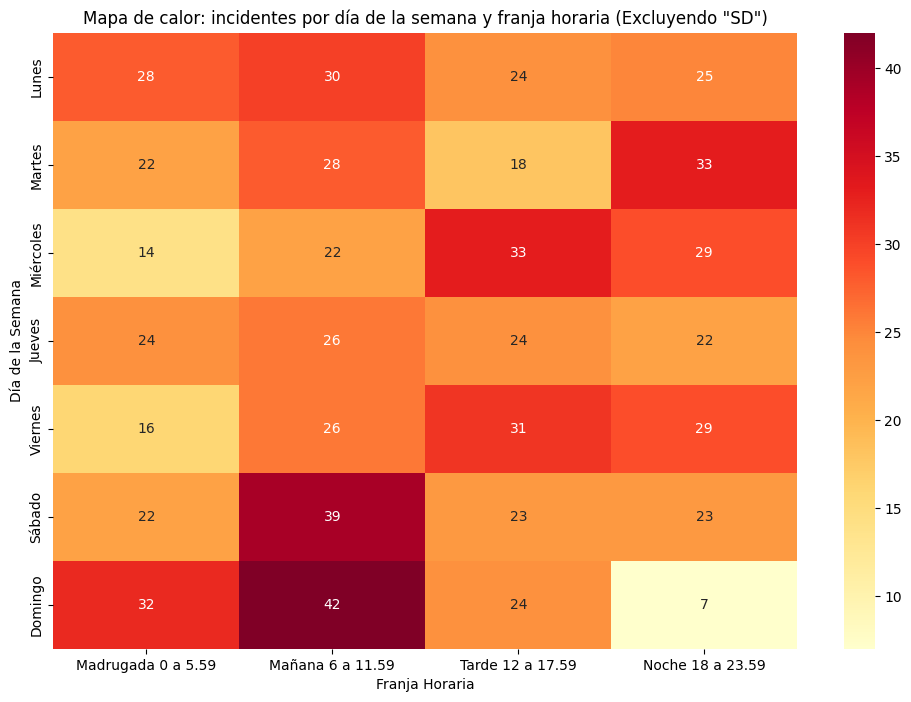

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir la columna 'FECHA' a tipo de dato datetime
df['FECHA'] = pd.to_datetime(df['FECHA'])

# Filtrar el DataFrame para excluir filas donde 'HH' es igual a 'SD'
df = df[df['HH'] != 'SD']

# Crear una nueva columna 'DIA_SEMANA' que contenga el nombre del día de la semana
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
df['DIA_SEMANA'] = df['FECHA'].dt.dayofweek.map(lambda x: dias_semana[x])

# Crear una nueva columna 'FRANJA_HORARIA' en función de la hora
def asignar_franja_horaria(hora):
    hora = int(hora)  # Convertir la hora a un valor numérico (int)
    if 0 <= hora < 6:
        return 'Madrugada'
    elif 6 <= hora < 12:
        return 'Mañana'
    elif 12 <= hora < 18:
        return 'Tarde'
    else:
        return 'Noche'

df['FRANJA_HORARIA'] = df['HH'].apply(asignar_franja_horaria)

# Crear una tabla pivot para contar los incidentes por día de la semana y franja horaria
pivot_table = df.pivot_table(index='DIA_SEMANA', columns='FRANJA_HORARIA', aggfunc='size', fill_value=0)

# Ordenar los días de la semana de lunes a domingo
pivot_table = pivot_table.reindex(dias_semana)

# Crear el gráfico de heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='d', cbar=True)
plt.xlabel('Franja Horaria')
plt.ylabel('Día de la Semana')
plt.title('Mapa de calor: incidentes por día de la semana y franja horaria (Excluyendo "SD")')
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=['Madrugada 0 a 5.59', 'Mañana 6 a 11.59', 'Tarde 12 a 17.59', 'Noche 18 a 23.59'])
plt.show()


### Contrario a lo que indicaría el sentido común que haría suponer que los días y horarios de mayor siniestralidad son los días hábiles por la mañana o por la tarde en circunstancias de hora pico en cantidad de tráfico, resulta que son los fines de semana en la franja de la mañana los que alcanzan los valores máximos de cantidad de víctimas fatales.

* Comportamiento Inesperado: A veces, los datos pueden revelar patrones de comportamiento que van en contra de las percepciones comunes. Este hallazgo subraya la importancia de basar las políticas de seguridad vial en datos y análisis objetivos en lugar de suposiciones o estereotipos.

* Posibles Explicaciones: Para comprender mejor este fenómeno, podría ser útil explorar posibles explicaciones. Por ejemplo, podría haber factores específicos, como eventos culturales o de entretenimiento los fines de semana, que contribuyan a un aumento en la actividad vial durante esos días y horarios. El caso de que los conductores regresan a sus hogares en estados no aptos para su circulación sugiere el efecto de bebidas alcóholicas, o la falta de sueño y concentración a la hora de circular, como algunos potenciales factores que contribuyen a este punto.

* Estrategias de Prevención: El conocimiento de estos patrones inusuales puede guiar el desarrollo de estrategias específicas de prevención. Por ejemplo, se podrían implementar medidas adicionales de aplicación de la ley y concientización durante los sábados y domingos por la mañana para abordar esta siniestralidad.

* Educación y Concienciación: La concienciación pública sobre la seguridad vial, especialmente durante los fines de semana por la mañana, puede ser esencial. Las campañas de educación dirigidas a conductores y peatones en estos momentos específicos pueden ayudar a reducir la siniestralidad.

* Monitoreo Continuo: Es importante seguir monitoreando y analizando estos patrones a lo largo del tiempo para asegurarse de que las estrategias de prevención sean efectivas y que se estén tomando medidas adecuadas para abordar la siniestralidad en estos momentos inesperados.

## Análisis interanual

Luego de un análisis exhaustivo de los datos presentes para extraer hipótesis apriorísticas que nos permitan comprender la realidad de los siniestros viales en base a datos empíricos, comenzamos el abordaje analítico en el estudio de la dinámica interanual de los siniestros.

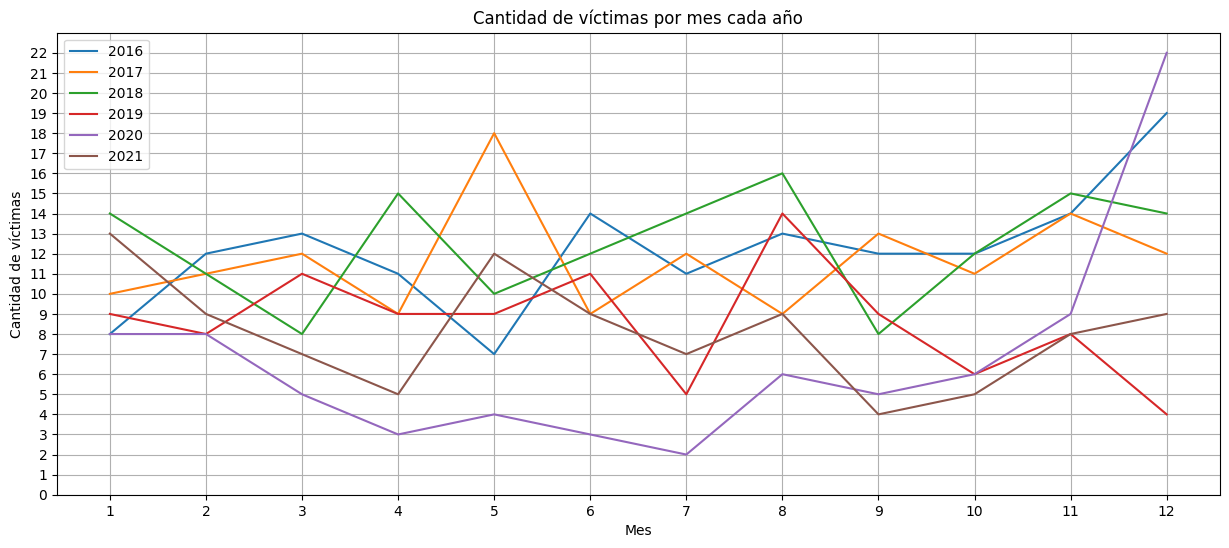

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'FECHA' a tipo de dato datetime
df['FECHA'] = pd.to_datetime(df['FECHA'])

# Extraer el año y el mes de la columna 'FECHA'
df['AÑO'] = df['FECHA'].dt.year
df['MES'] = df['FECHA'].dt.month

# Contar la cantidad de filas por año y mes
counts = df.groupby(['AÑO', 'MES']).size().unstack(fill_value=0)

# Crear el gráfico de líneas con un color diferente para cada año
plt.figure(figsize=(15, 6))
for year in counts.index:
    plt.plot(counts.columns, counts.loc[year], label=str(year))

plt.xlabel('Mes')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas por mes cada año')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 13))
plt.yticks(range(0, max(counts.values.max(), 1) + 1))  # Set y-ticks as integers


plt.show()
columns_to_drop = ['AÑO', 'MES']
df.drop(columns=columns_to_drop, inplace=True)

<Figure size 1500x1000 with 0 Axes>

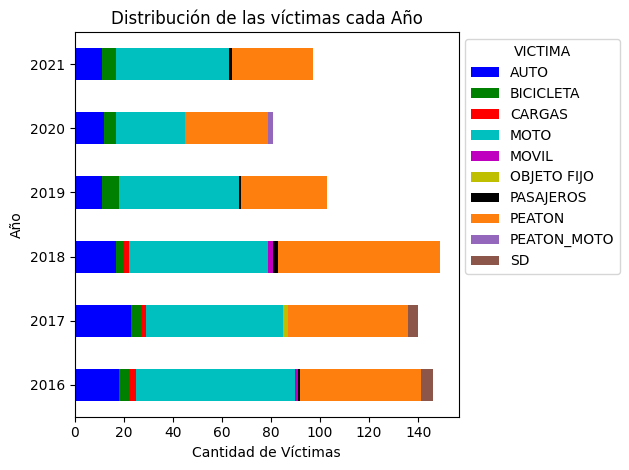

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'FECHA' a tipo de dato datetime
df['FECHA'] = pd.to_datetime(df['FECHA'])

# Extraer el año de la columna 'FECHA' y asignarlo a una nueva columna 'AÑO'
df['AÑO'] = df['FECHA'].dt.year

# Contar la cantidad de cada valor en la columna 'VICTIMA' por año
counts = df.groupby(['AÑO', 'VICTIMA']).size().unstack(fill_value=0)

# Crear un gráfico de barras horizontales
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:orange', 'tab:purple', 'tab:brown']
plt.figure(figsize=(15, 10))
counts.plot(kind='barh', stacked=True, color=colors)
plt.xlabel('Cantidad de Víctimas')
plt.ylabel('Año')
plt.title('Distribución de las víctimas cada Año')

# Mover la leyenda fuera del gráfico a la derecha
plt.legend(title='VICTIMA', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


<Figure size 1500x1000 with 0 Axes>

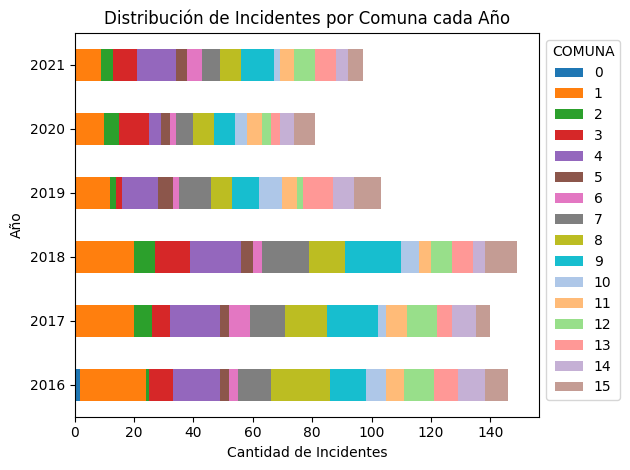

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la columna 'FECHA' a tipo de dato datetime
df['FECHA'] = pd.to_datetime(df['FECHA'])

# Extraer el año de la columna 'FECHA' y asignarlo a una nueva columna 'AÑO'
df['AÑO'] = df['FECHA'].dt.year

# Contar la cantidad de cada valor en la columna 'COMUNA' por año
counts = df.groupby(['AÑO', 'COMUNA']).size().unstack(fill_value=0)

# Crear una paleta de colores personalizada con 16 colores distintos
colores_personalizados = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 
                          '#bcbd22', '#17becf', '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', '#c49c94']

# Crear un gráfico de barras horizontales con la paleta de colores personalizada
plt.figure(figsize=(15, 10))
counts.plot(kind='barh', stacked=True, color=colores_personalizados)
plt.xlabel('Cantidad de Incidentes')
plt.ylabel('Año')
plt.title('Distribución de Incidentes por Comuna cada Año')

# Mover la leyenda fuera del gráfico a la derecha
plt.legend(title='COMUNA', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


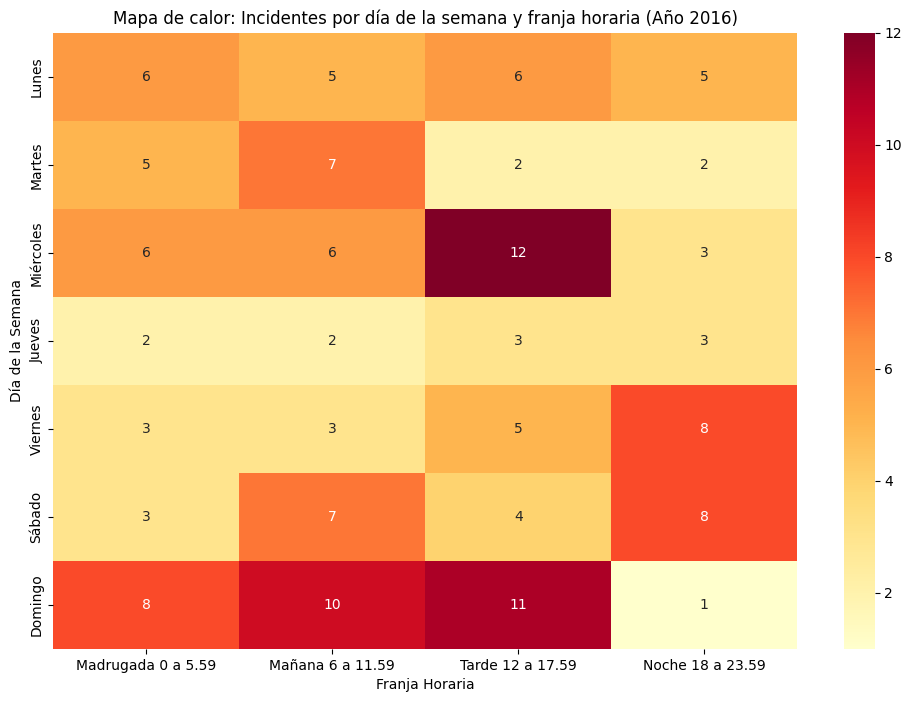

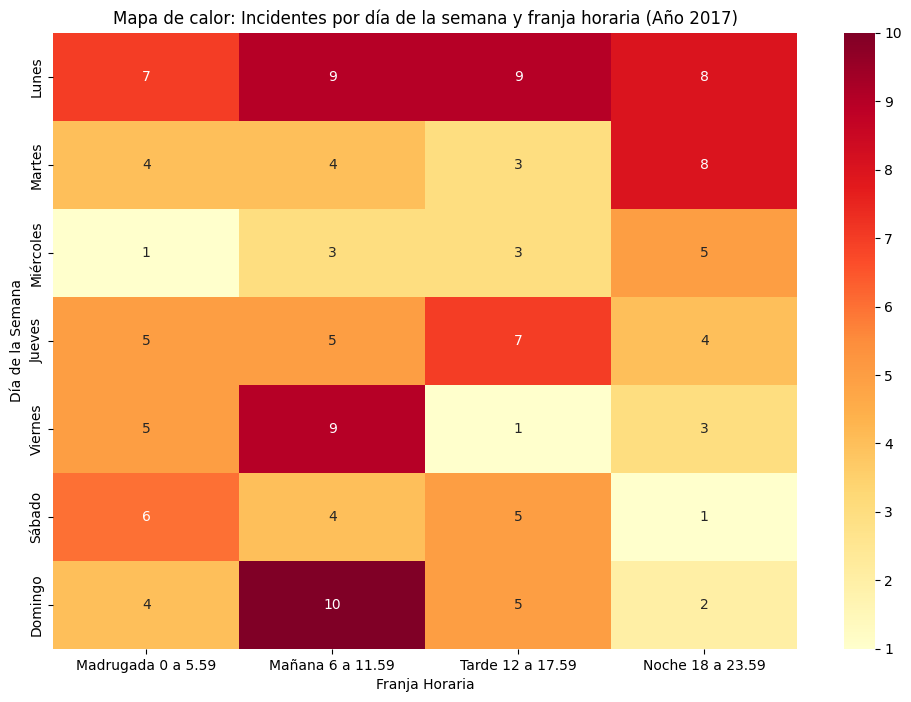

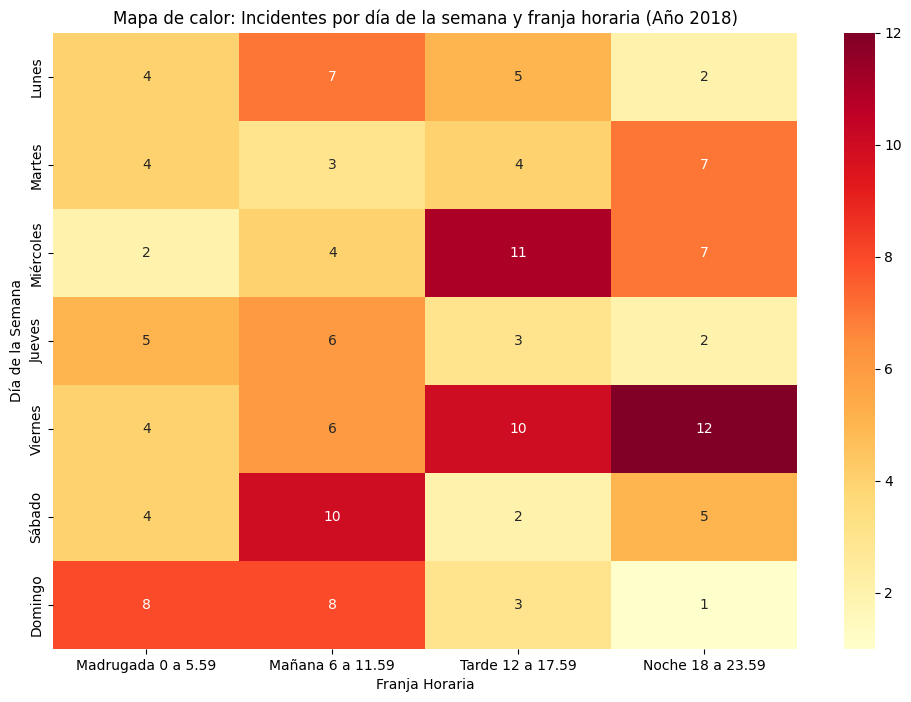

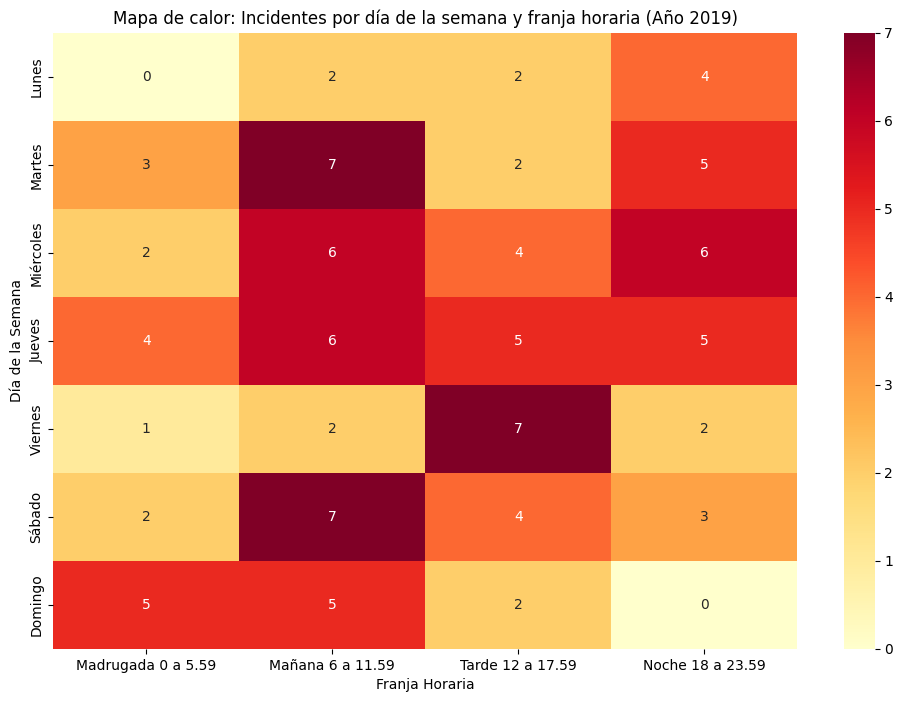

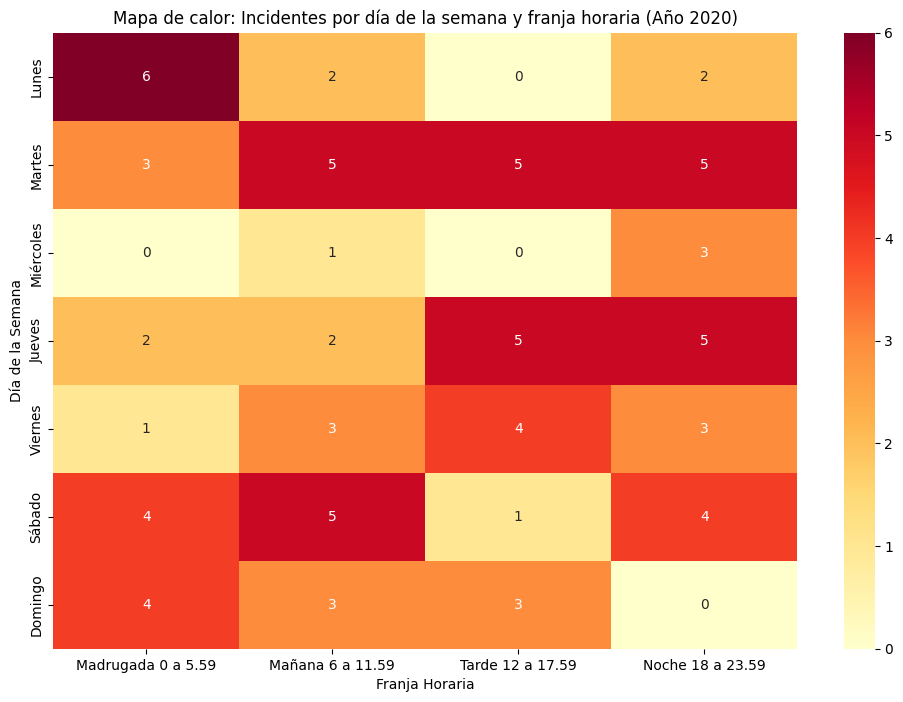

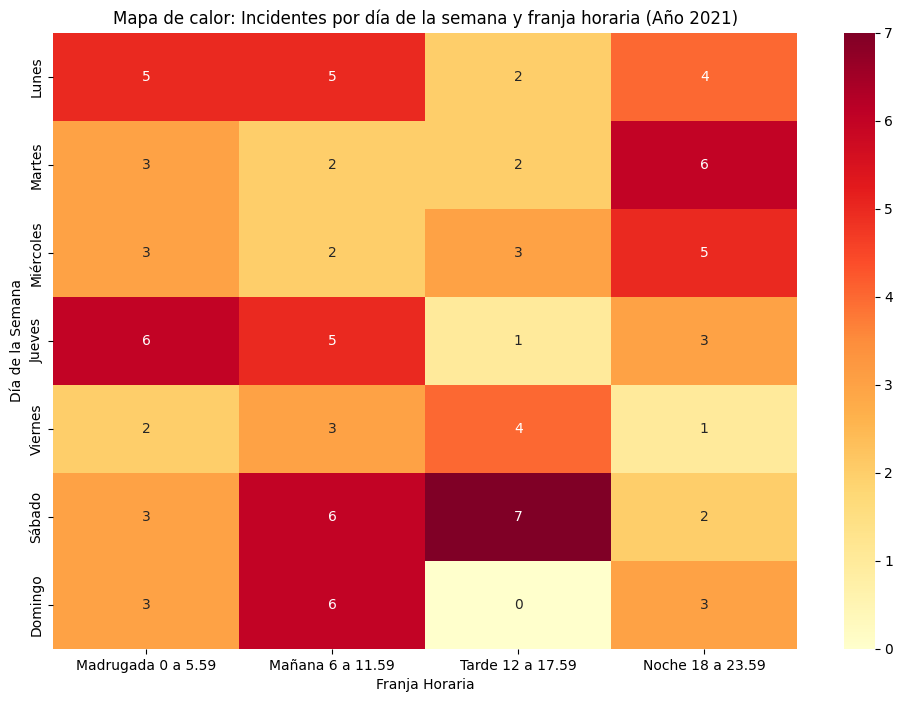

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir la columna 'FECHA' a tipo de dato datetime
df['FECHA'] = pd.to_datetime(df['FECHA'])

# Filtrar el DataFrame para excluir filas donde 'HH' es igual a 'SD'
df = df[df['HH'] != 'SD']

# Crear una nueva columna 'DIA_SEMANA' que contenga el nombre del día de la semana
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
df['DIA_SEMANA'] = df['FECHA'].dt.dayofweek.map(lambda x: dias_semana[x])

# Crear una nueva columna 'FRANJA_HORARIA' en función de la hora
def asignar_franja_horaria(hora):
    hora = int(hora)  # Convertir la hora a un valor numérico (int)
    if 0 <= hora < 6:
        return 'Madrugada'
    elif 6 <= hora < 12:
        return 'Mañana'
    elif 12 <= hora < 18:
        return 'Tarde'
    else:
        return 'Noche'

df['FRANJA_HORARIA'] = df['HH'].apply(asignar_franja_horaria)

# Obtener la lista de años presentes en la columna 'FECHA'
años_presentes = df['FECHA'].dt.year.unique()

# Crear un gráfico de mapa de calor para cada año
for año in años_presentes:
    df_año = df[df['FECHA'].dt.year == año]
    pivot_table = df_año.pivot_table(index='DIA_SEMANA', columns='FRANJA_HORARIA', aggfunc='size', fill_value=0)
    pivot_table = pivot_table.reindex(dias_semana)
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='d', cbar=True)
    plt.xlabel('Franja Horaria')
    plt.ylabel('Día de la Semana')
    plt.title(f'Mapa de calor: Incidentes por día de la semana y franja horaria (Año {año})')
    plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=['Madrugada 0 a 5.59', 'Mañana 6 a 11.59', 'Tarde 12 a 17.59', 'Noche 18 a 23.59'])
    plt.show()


## Conclusión

Es interesante notar que al analizar la información desagregada por año, no se observa un patrón definido de comportamiento en todos los aspectos, lo que sugiere que pueden influir múltiples factores en la distribución de incidentes. Sin embargo, el hecho de que se repita la alta fatalidad de motos y peatones a lo largo de los años es un hallazgo significativo y puede indicar áreas de enfoque para las políticas de seguridad vial.

Este tipo de análisis desagregado por año es valioso para comprender mejor las tendencias y los cambios a lo largo del tiempo, lo que puede ser útil para la formulación de políticas públicas y estrategias de seguridad vial. Identificar patrones circunstanciales y recurrentes es un paso importante para abordar problemas específicos y desarrollar medidas preventivas y correctivas adecuadas.

# KPIs



Los dos KPIs propuestos son importantes indicadores de seguridad vial en la Ciudad de Buenos Aires (CABA). Además, un tercero propuesto por nosotros, relacionado con la disminución de los datos faltantes, también es relevante ya que la calidad de los datos es fundamental para llevar a cabo análisis precisos y tomar decisiones informadas en políticas de seguridad vial. 

1) Tasa de Homicidios en Siniestros Viales:

Este KPI mide la cantidad de víctimas fatales en accidentes de tránsito en relación con la población total de la Ciudad de Buenos Aires.
El objetivo es reducir esta tasa en un 10% en el último semestre de 2021 en comparación con el semestre anterior.
La reducción de esta tasa indica un mejoramiento en la seguridad vial y la prevención de accidentes mortales en las calles de la ciudad.

2) Cantidad de Accidentes Mortales de Motociclistas en Siniestros Viales:

Este KPI se enfoca en los accidentes mortales que involucran a motociclistas como víctimas.
El objetivo es reducir la cantidad de estos accidentes en un 7% en el último año en comparación con el año anterior.
Esta métrica es importante debido a la alta incidencia de accidentes mortales de motociclistas y busca mejorar la seguridad de quienes usan este medio de transporte.

In [103]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'df' con la columna 'FECHA' que contiene las fechas de los siniestros viales.

# Convertir la columna 'FECHA' a tipo de dato datetime
df['FECHA'] = pd.to_datetime(df['FECHA'])

# Crear una nueva columna 'SEMESTRE' para identificar a qué semestre pertenece cada fecha
df['SEMESTRE'] = df['FECHA'].dt.month.apply(lambda x: 1 if x <= 6 else 2)

# Calcular la cantidad de víctimas fatales por semestre
victimas_por_semestre = df.groupby(['AÑO', 'SEMESTRE']).size().reset_index(name='VICTIMAS_FATALES')

# Población total en la Ciudad de Buenos Aires
poblacion_total = 3120612

# Calcular la tasa de fatalidad por cada 100,000 habitantes
victimas_por_semestre['TASA'] = (victimas_por_semestre['VICTIMAS_FATALES'] / poblacion_total) * 100000

# Calcular la diferencia porcentual entre la tasa actual y la del semestre anterior
victimas_por_semestre['DIFERENCIA'] = (victimas_por_semestre['TASA'] / victimas_por_semestre['TASA'].shift(1) - 1) * 100

# Mostrar el DataFrame resultante
print(victimas_por_semestre)


     AÑO  SEMESTRE  VICTIMAS_FATALES      TASA  DIFERENCIA
0   2016         1                65  2.082925         NaN
1   2016         2                81  2.595645   24.615385
2   2017         1                69  2.211105  -14.814815
3   2017         2                71  2.275195    2.898551
4   2018         1                70  2.243150   -1.408451
5   2018         2                79  2.531555   12.857143
6   2019         1                57  1.826565  -27.848101
7   2019         2                46  1.474070  -19.298246
8   2020         1                31  0.993395  -32.608696
9   2020         2                50  1.602250   61.290323
10  2021         1                55  1.762475   10.000000
11  2021         2                42  1.345890  -23.636364


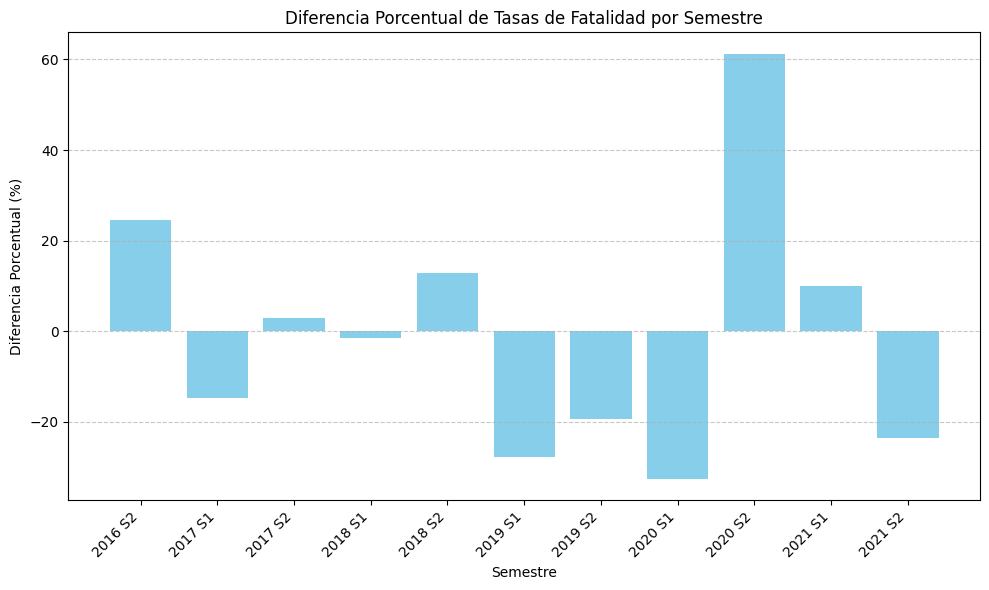

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'victimas_por_semestre' con las tasas y diferencias porcentuales.

# Crear el gráfico de barras para mostrar la diferencia porcentual
plt.figure(figsize=(10, 6))
plt.bar(victimas_por_semestre['AÑO'].astype(str) + ' S' + victimas_por_semestre['SEMESTRE'].astype(str), 
        victimas_por_semestre['DIFERENCIA'], color='skyblue')
plt.xlabel('Semestre')
plt.ylabel('Diferencia Porcentual (%)')
plt.title('Diferencia Porcentual de Tasas de Fatalidad por Semestre')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [105]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'df' con la columna 'FECHA' que contiene las fechas de los siniestros viales.

# Convertir la columna 'FECHA' a tipo de dato datetime
df['FECHA'] = pd.to_datetime(df['FECHA'])

# Filtrar el DataFrame para incluir solo las filas donde 'VICTIMA' sea 'MOTO'
df_motos = df[df['VICTIMA'] == 'MOTO']

# Crear una nueva columna 'SEMESTRE' para identificar a qué semestre pertenece cada fecha
df_motos['SEMESTRE'] = df_motos['FECHA'].dt.month.apply(lambda x: 1 if x <= 6 else 2)

# Calcular la cantidad de víctimas fatales por semestre
victimas_por_semestre = df_motos.groupby(['AÑO', 'SEMESTRE']).size().reset_index(name='VICTIMAS_FATALES')

# Población total en la Ciudad de Buenos Aires
poblacion_total = 3120612

# Calcular la tasa de fatalidad por cada 100,000 habitantes
victimas_por_semestre['TASA'] = (victimas_por_semestre['VICTIMAS_FATALES'] / poblacion_total) * 100000

# Calcular la diferencia porcentual entre la tasa actual y la del semestre anterior
victimas_por_semestre['DIFERENCIA'] = (victimas_por_semestre['TASA'] / victimas_por_semestre['TASA'].shift(1) - 1) * 100

# Mostrar el DataFrame resultante
print(victimas_por_semestre)


     AÑO  SEMESTRE  VICTIMAS_FATALES      TASA  DIFERENCIA
0   2016         1                29  0.929305         NaN
1   2016         2                36  1.153620   24.137931
2   2017         1                32  1.025440  -11.111111
3   2017         2                24  0.769080  -25.000000
4   2018         1                27  0.865215   12.500000
5   2018         2                30  0.961350   11.111111
6   2019         1                28  0.897260   -6.666667
7   2019         2                21  0.672945  -25.000000
8   2020         1                12  0.384540  -42.857143
9   2020         2                16  0.512720   33.333333
10  2021         1                28  0.897260   75.000000
11  2021         2                18  0.576810  -35.714286


C:\Users\juanp\AppData\Local\Temp\ipykernel_4076\3693279169.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_motos['SEMESTRE'] = df_motos['FECHA'].dt.month.apply(lambda x: 1 if x <= 6 else 2)


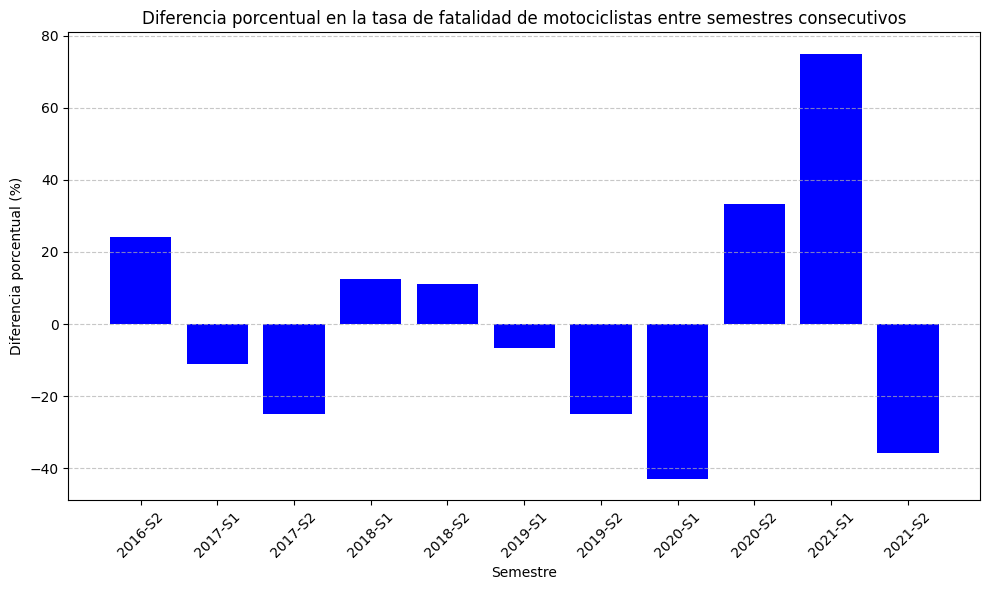

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'victimas_por_semestre' que contiene los datos calculados previamente.

# Crear un gráfico de barras para visualizar la diferencia porcentual
plt.figure(figsize=(10, 6))
plt.bar(victimas_por_semestre['AÑO'].astype(str) + '-S' + victimas_por_semestre['SEMESTRE'].astype(str), victimas_por_semestre['DIFERENCIA'], color='blue')
plt.xlabel('Semestre')
plt.ylabel('Diferencia porcentual (%)')
plt.title('Diferencia porcentual en la tasa de fatalidad de motociclistas entre semestres consecutivos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


## Conclusión

Se verifica la reducción del 10% de la tasa de homicidios en siniestros viales para el 2do semestre de 2021 y la reducción del 7% para la tasa de homicidios en siniestros cuya víctima sea una moto.